In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.drop('Loan_ID' , axis =1 , inplace=True)
df.shape

(614, 12)

# checking for missing values

In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
for i in df.columns :
    print(df[i].value_counts())
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# find the percentage of missing values
missing = df.isnull().sum().sort_values(ascending=False)
percentage = (missing/len(df))*100
perc= pd.DataFrame()
perc['no of missing values'] = missing
perc['percentage %'] = percentage
perc

,no of missing values,percentage %
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000


- the majority of missing values are above 1 % of data in each column so we can not just drop them
- columns Gender , Married , Dependant , self_Employed , Credit_History are categorical data so we will use mode to fill nan values
- LoanAmount is continuous numerical data so we will detect to use mean or median according to outliers 
- Loan_Amount_Term is numerical discrete data so we will use mode to fill nan values

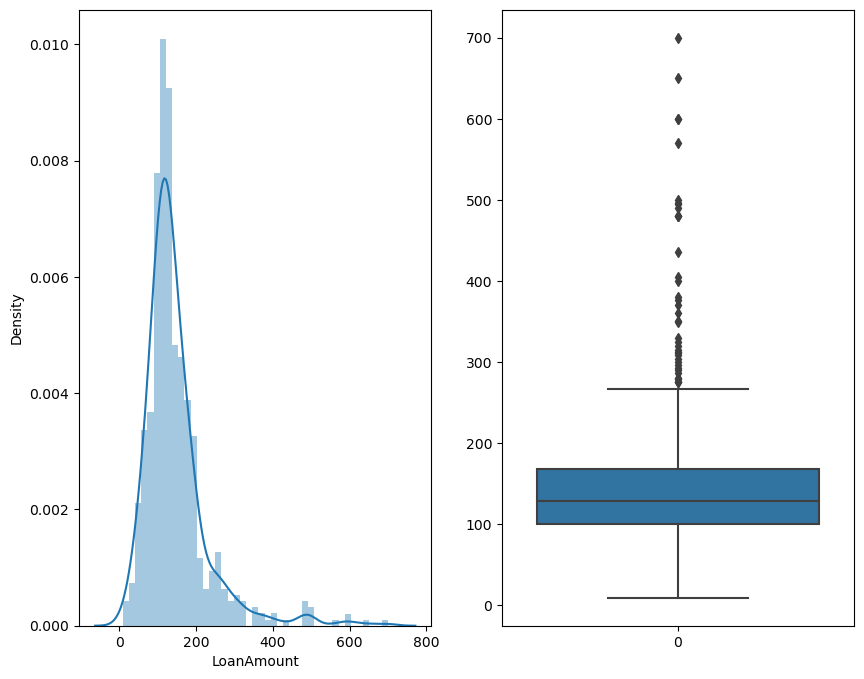

In [8]:
fig , axx = plt.subplots(1,2, figsize=(10,8))
sns.distplot(df['LoanAmount'] , ax=axx[0])
sns.boxplot(df['LoanAmount'] , ax=axx[1])
plt.show()

- There are outliers and the data is not normally distributed as it is skewed to right so we will use median to fill nan values

In [9]:
# categorical data :
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# numerical discrete data :
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
# in Loan_Amount_Term number of unique values is so little according to dataset's rows so we consider it as categorical data(discrete for numerical)

#numerical continuous data :
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [10]:
#check for null values:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

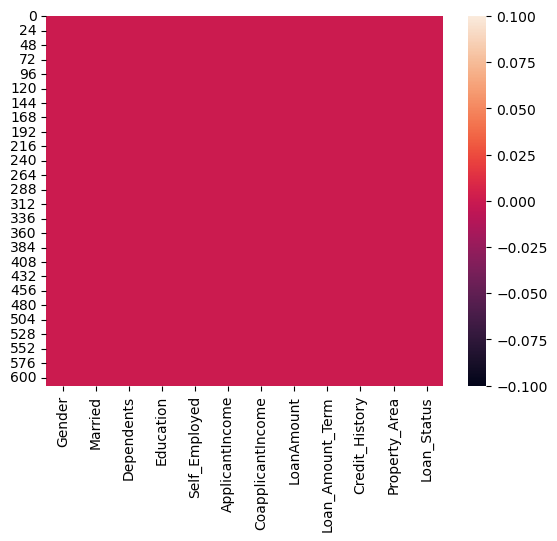

In [11]:
sns.heatmap(df.isnull())
plt.show()

There are no missing values

# Statistical Analysis

In [12]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [13]:
# we will convert object to numerical
df['Dependents'] = df['Dependents'].replace({'0':0 , '1':1 , '2':2 , '3+':3})

In [14]:
df['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [16]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


- all numerical cntinuous columns ApplicantIncome ,CoapplicantIncome ,LoanAmount are skewed to right as mean is greater than median
- all discrete numerical columns with categorical data are skewd to left as mean is lower than median
- there are outliers in all columns except Credit_History

# Data Visualization

In [17]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

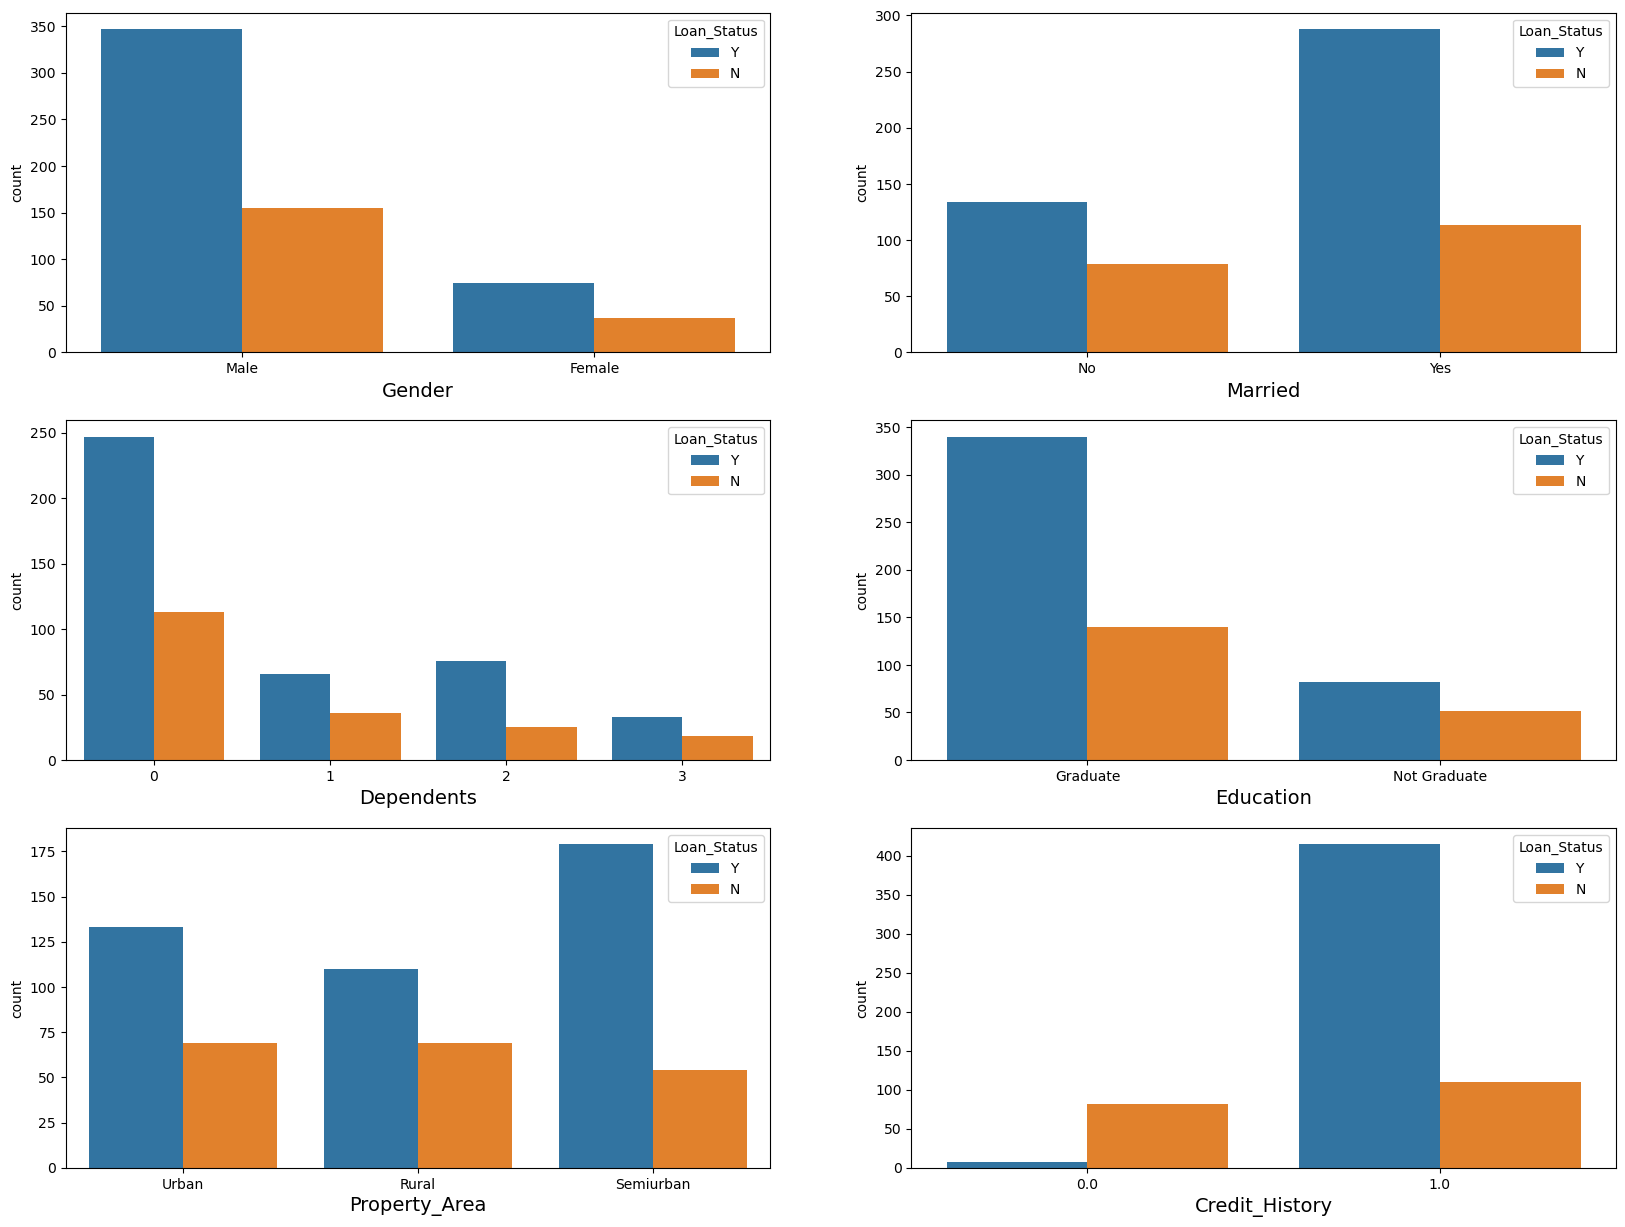

In [18]:
plt.figure(figsize=(20,15))
cols=['Gender', 'Married', 'Dependents', 'Education','Property_Area' ,'Credit_History']
plotnum = 1
for i in cols:
    if plotnum <= 6 :
        ax = plt.subplot(3,2,plotnum)
        sns.countplot(x=df[i] , hue=df['Loan_Status'])
        plt.xlabel(i,fontsize=14)
    plotnum +=1
plt.show()    

- male applicants are more eligible to be availed to loan request than females
- married applicant are more eligible to be availed to loan request than single ones
- most of applicants have on dependents are the most eligible ones to be availed to a loan request
- Graduate applicants are more eligible to loan request than non graduate as they are guaranteed to repay back
- most of applicants who are eligible to loan request come from semiurban while Rural are the least
- most of applicants who are eligible to loan request are able to repat debts

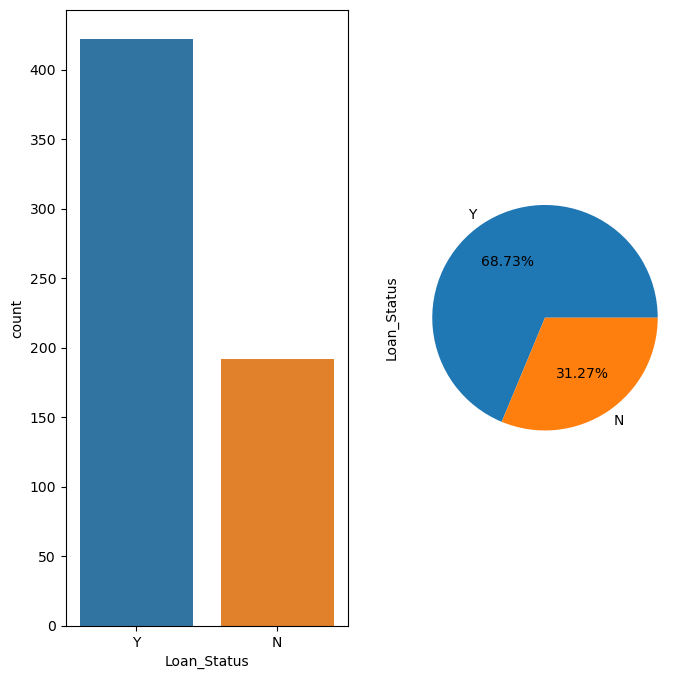

In [19]:
fig , axx = plt.subplots(1,2,figsize=(8,8))
sns.countplot(x=df['Loan_Status'] , ax = axx[0])
df['Loan_Status'].value_counts().plot(kind='pie' , labels= df['Loan_Status'].unique()  ,autopct='%.2f%%', ax=axx[1])
plt.show()

- 68.73 % of applicants are eligible to loan request
- 31.27 % of applicants are not eligible to loan request

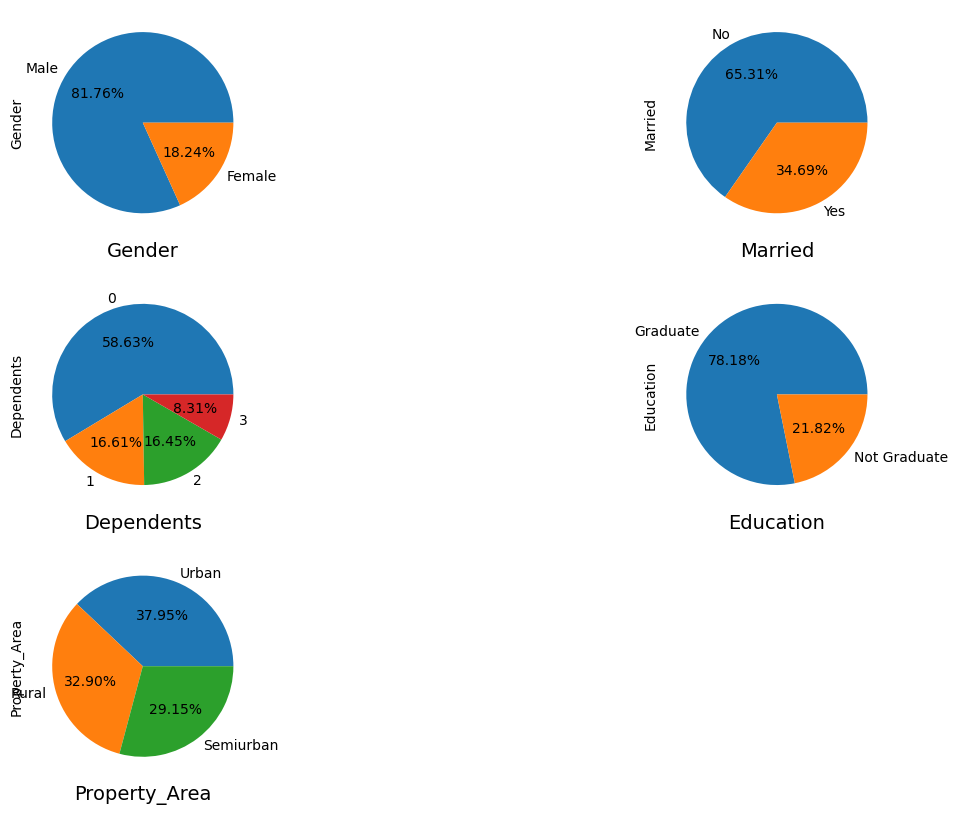

In [20]:
plt.figure(figsize=(15,10))
cols=['Gender', 'Married', 'Dependents', 'Education','Property_Area']
plotnum = 1
for i in cols:
    if plotnum <= 5 :
        ax = plt.subplot(3,2,plotnum)
        df[i].value_counts().plot(kind='pie', labels=df[i].unique() ,autopct='%.2f%%')
        plt.xlabel(i,fontsize=14)
    plotnum +=1
plt.show()    

- most of applicants are males
- most of applicants are singles
- most of applicants have no dependents
- most of applicants are Graduates
- most of applicants are from urban
- data of Gender , Married , Dependents , Education are imbalanced

  Property_Area  ApplicantIncome
0         Rural      5554.083799
1         Urban      5398.247525
2     Semiurban      5292.261803


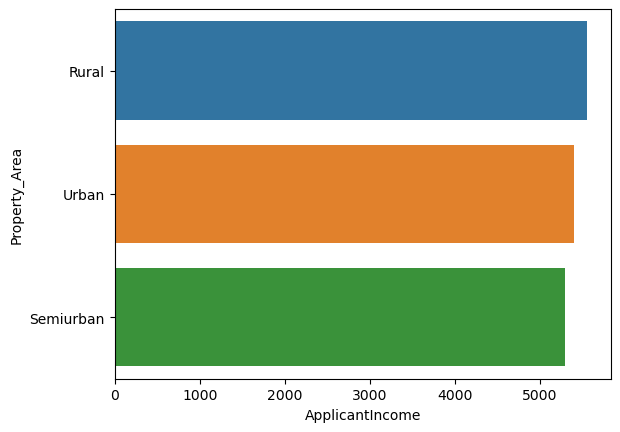

In [21]:
applicantincome = df.groupby('Property_Area')['ApplicantIncome'].mean().sort_values(ascending=False).reset_index()
print(applicantincome)
sns.barplot(x= 'ApplicantIncome' , y='Property_Area' , data= applicantincome)
plt.show()

- Rural of state has the highest disposable income available for the applicant's use under State law

  Property_Area  CoapplicantIncome
0         Urban        1716.350495
1         Rural        1645.536983
2     Semiurban        1520.133047


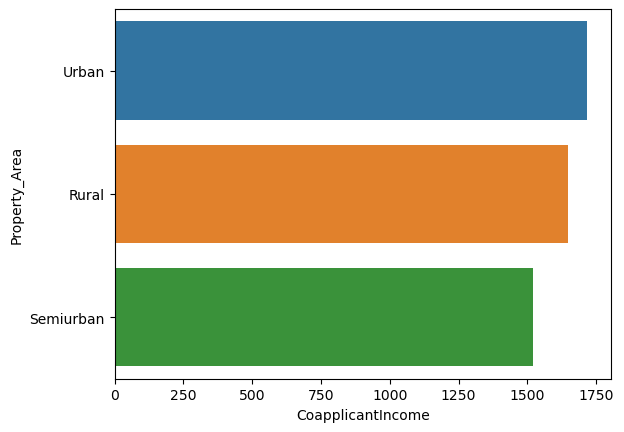

In [22]:
CoapplicantIncome = df.groupby('Property_Area')['CoapplicantIncome'].mean().sort_values(ascending=False).reset_index()
print(CoapplicantIncome)
sns.barplot(x= 'CoapplicantIncome' , y='Property_Area' , data= CoapplicantIncome)
plt.show()

- The highest average of disposable income available for people from urban

  Property_Area  LoanAmount
0         Rural  151.178771
1     Semiurban  144.957082
2         Urban  140.990099


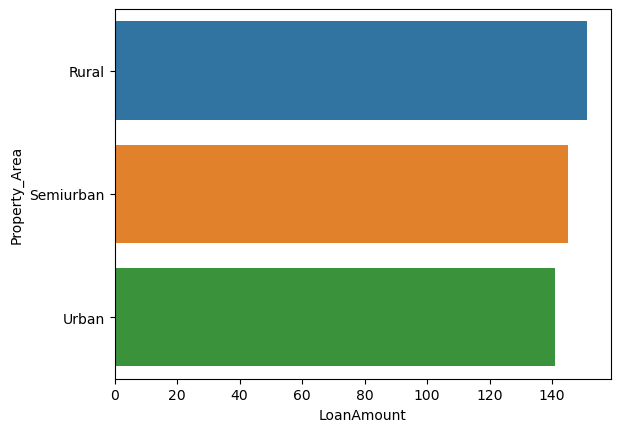

In [23]:
loans = df.groupby('Property_Area')['LoanAmount'].mean().sort_values(ascending=False).reset_index()
print(loans)
sns.barplot(x= 'LoanAmount' , y='Property_Area' , data= loans)
plt.show()

- The highest loans' money are taked by peple from Rural

# Checking for outliers

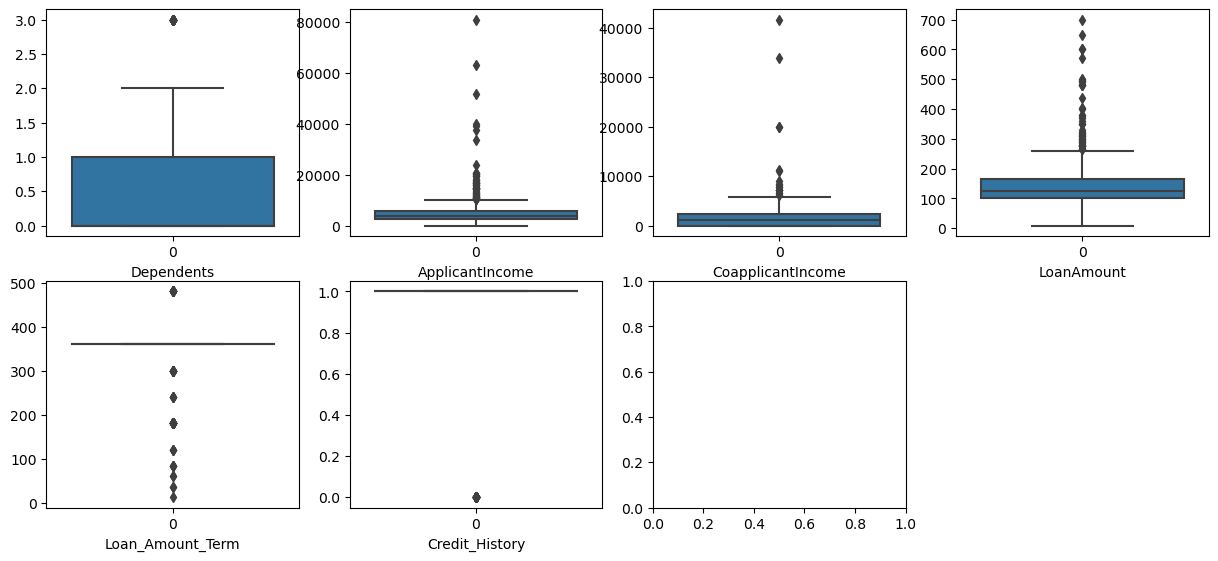

In [24]:
plt.figure(figsize=(15,10))
plotnum = 1
for i in df.columns :
    if plotnum <= 12 :
        ax = plt.subplot(3,4,plotnum)
        if df[i].dtypes == 'object':
            continue
        sns.boxplot(df[i])
        plt.xlabel(i , fontsize=10)
    plotnum += 1
plt.show()    

- we have to remove outliers in columns with numerical continuous data Applicantincoome , Coapplicantincome , LooanAmount 

In [25]:
#zscore
from scipy.stats import zscore

In [26]:
outliers = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
z = np.abs(zscore(outliers))

In [27]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(589, 12)

In [28]:
print('percentage of loss is ',((df.shape[0]-df1.shape[0])/df.shape[0])*100,' %')

percentage of loss is  4.071661237785016  %


In [31]:
#IQR method
out = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

q1 = out.quantile(0.25) #1st
q3 = out.quantile(0.75) #3rd
IQR = q3 - q1
df2 = df[~((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR))).any(axis=1)]
df2.shape

(459, 12)

In [32]:
print('percentage of loss is ',((df.shape[0]-df2.shape[0])/df.shape[0])*100,' %')

percentage of loss is  25.2442996742671  %


zscore is the best method as IQR dropped quarter of data which we can not afford it

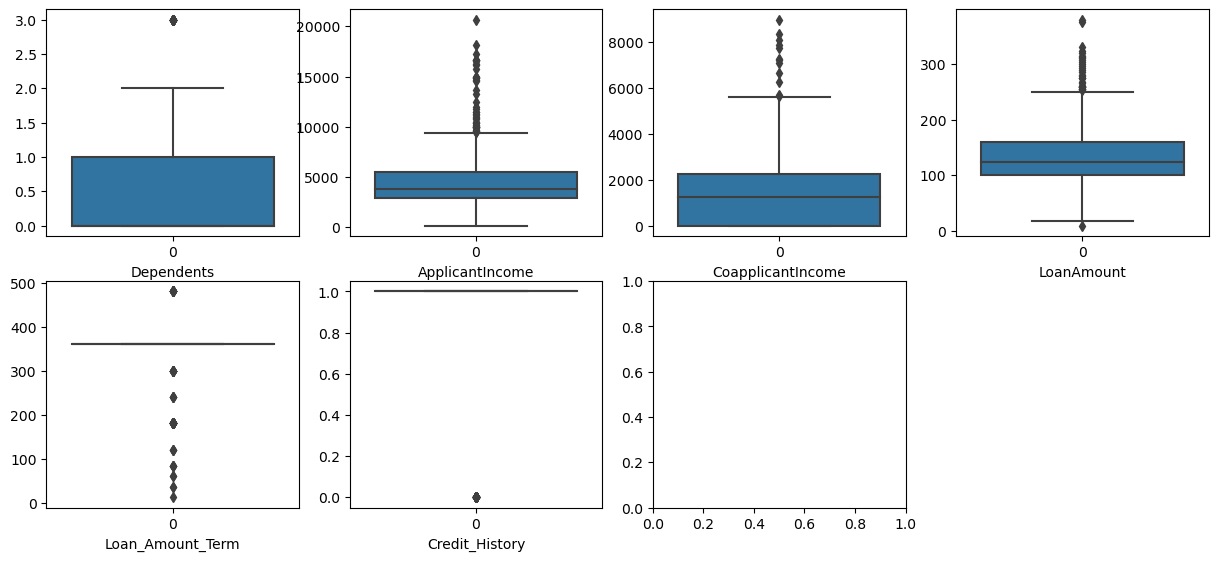

In [33]:
plt.figure(figsize=(15,10))
plotnum = 1
for i in df1.columns :
    if plotnum <= 12 :
        ax = plt.subplot(3,4,plotnum)
        if df[i].dtypes == 'object':
            continue
        sns.boxplot(df1[i])
        plt.xlabel(i , fontsize=10)
    plotnum += 1
plt.show()    

we reduced outliers as we could

# skewness

In [34]:
df1.skew()

Dependents           1.038787
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.126225
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

- columns Dependents ,Loan_Amount_Term ,Credit_History are categorical columns so no need to remove its skewness
- columns ApplicantIncome ,CoapplicantIncome, LoanAmount are countinuous data so we will remove its skewness
- we prefer to use PowerTransform method because there are +/- skewness and they have outliers

In [35]:
from sklearn.preprocessing import power_transform

In [36]:
df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = power_transform(df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']],method='yeo-johnson')

In [37]:
df1.skew()

Dependents           1.038787
ApplicantIncome      0.028063
CoapplicantIncome   -0.186195
LoanAmount           0.060859
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
dtype: float64

we removed skewness of all continuous data

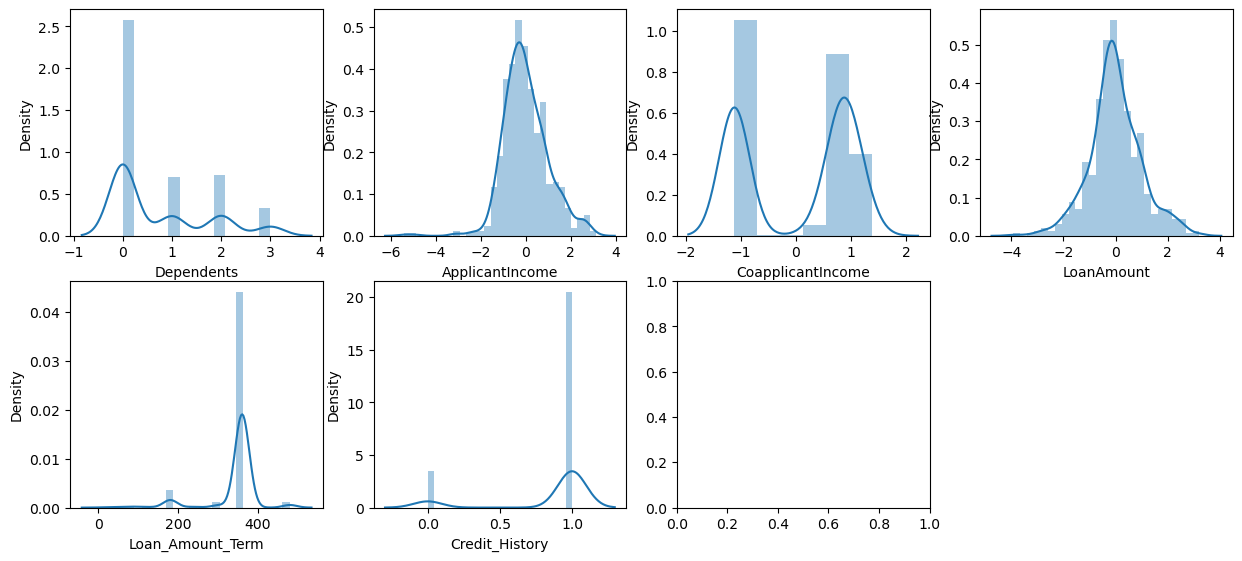

In [38]:
plt.figure(figsize=(15,10))
plotnum = 1
for i in df1.columns :
    if plotnum <= 12 :
        ax = plt.subplot(3,4,plotnum)
        if df[i].dtypes == 'object':
            continue
        sns.distplot(df1[i])
        plt.xlabel(i , fontsize=10)
    plotnum += 1
plt.show()    

- All data look normally distributed so we can move ahead

# correlation

In [41]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.239843,0.748807,0.011197,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.736280,-1.119438,0.245654,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.586262,-1.119438,-1.243560,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,0.039489,-1.119438,-2.218839,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.291744,0.180599,1.862977,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.173950,-1.119438,0.981792,360.0,1.0,Urban,Y


In [48]:
#we need to rset index first
df1.reset_index(inplace=True)

In [51]:
df1

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,0.239843,0.748807,0.011197,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,0.736280,-1.119438,0.245654,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,Female,No,0,Graduate,No,-0.586262,-1.119438,-1.243560,360.0,1.0,Rural,Y
585,610,Male,Yes,3,Graduate,No,0.039489,-1.119438,-2.218839,180.0,1.0,Rural,Y
586,611,Male,Yes,1,Graduate,No,1.291744,0.180599,1.862977,360.0,1.0,Urban,Y
587,612,Male,Yes,2,Graduate,No,1.173950,-1.119438,0.981792,360.0,1.0,Urban,Y


In [53]:
df1.drop('index',axis=1 , inplace=True)

In [54]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.688986,-1.119438,-0.140470,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.239843,0.748807,0.011197,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.525799,-1.119438,-1.380101,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.791841,0.899419,-0.140470,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.736280,-1.119438,0.245654,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
584,Female,No,0,Graduate,No,-0.586262,-1.119438,-1.243560,360.0,1.0,Rural,Y
585,Male,Yes,3,Graduate,No,0.039489,-1.119438,-2.218839,180.0,1.0,Rural,Y
586,Male,Yes,1,Graduate,No,1.291744,0.180599,1.862977,360.0,1.0,Urban,Y
587,Male,Yes,2,Graduate,No,1.173950,-1.119438,0.981792,360.0,1.0,Urban,Y


we resteted index

In [55]:
# convert categorical data to numerical ones:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        df1[i] = le.fit_transform(df1[i])

In [57]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.688986,-1.119438,-0.140470,360.0,1.0,2,1
1,1,1,1,0,0,0.239843,0.748807,0.011197,360.0,1.0,0,0
2,1,1,0,0,1,-0.525799,-1.119438,-1.380101,360.0,1.0,2,1
3,1,1,0,1,0,-0.791841,0.899419,-0.140470,360.0,1.0,2,1
4,1,0,0,0,0,0.736280,-1.119438,0.245654,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
584,0,0,0,0,0,-0.586262,-1.119438,-1.243560,360.0,1.0,0,1
585,1,1,3,0,0,0.039489,-1.119438,-2.218839,180.0,1.0,0,1
586,1,1,1,0,0,1.291744,0.180599,1.862977,360.0,1.0,2,1
587,1,1,2,0,0,1.173950,-1.119438,0.981792,360.0,1.0,2,1


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             589 non-null    int32  
 1   Married            589 non-null    int32  
 2   Dependents         589 non-null    int64  
 3   Education          589 non-null    int32  
 4   Self_Employed      589 non-null    int32  
 5   ApplicantIncome    589 non-null    float64
 6   CoapplicantIncome  589 non-null    float64
 7   LoanAmount         589 non-null    float64
 8   Loan_Amount_Term   589 non-null    float64
 9   Credit_History     589 non-null    float64
 10  Property_Area      589 non-null    int32  
 11  Loan_Status        589 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 41.5 KB


All columns are numericals

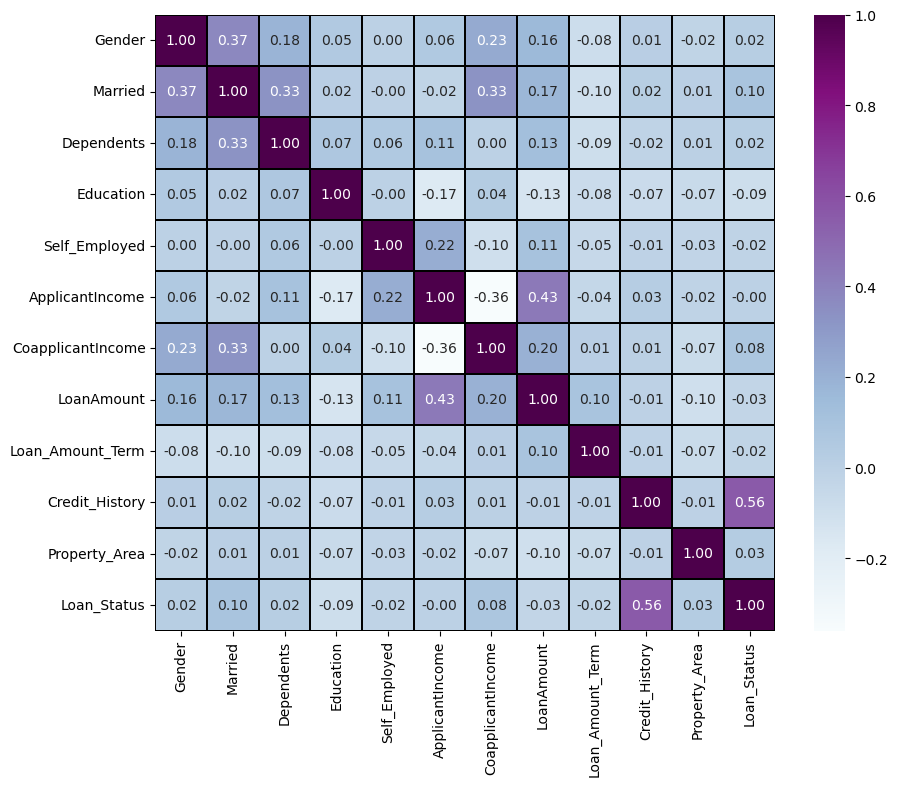

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr() , annot=True , linewidth=0.1 , cmap='BuPu' , fmt='.2f',linecolor='black')
plt.show()

- target variable Loan_status is highly positively correlated with Credit_History
- LoanAmount is highly positively correlated with ApplicantIncome
- Gender and married are positively correlated

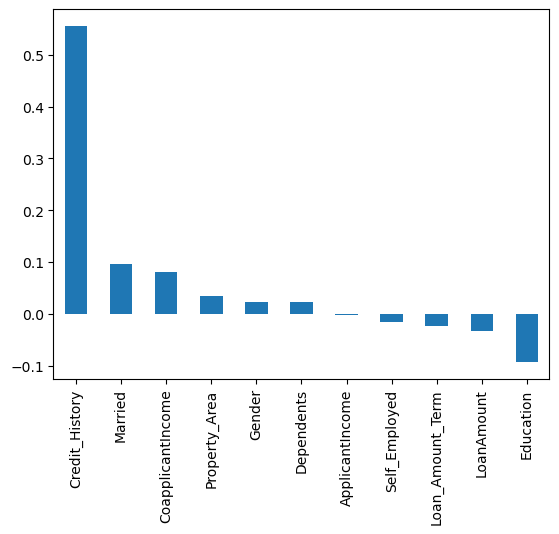

In [67]:
df1.corr()['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot(kind='bar')
plt.show()

# Scaling Data

In [68]:
x = df1.drop('Loan_Status' , axis=1)
y = df1['Loan_Status']

In [70]:
print('shape of features is ',x.shape)
print('target variable feature is ',y.shape)

shape of features is  (589, 11)
target variable feature is  (589,)


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
x_scaler = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaler , columns = x.columns)
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.688986,-1.119438,-0.140470,0.272306,0.413490,1.222929
1,0.476533,0.733389,0.276349,-0.542684,-0.384900,0.239843,0.748807,0.011197,0.272306,0.413490,-1.313356
2,0.476533,0.733389,-0.728402,-0.542684,2.598076,-0.525799,-1.119438,-1.380101,0.272306,0.413490,1.222929
3,0.476533,0.733389,-0.728402,1.842694,-0.384900,-0.791841,0.899419,-0.140470,0.272306,0.413490,1.222929
4,0.476533,-1.363533,-0.728402,-0.542684,-0.384900,0.736280,-1.119438,0.245654,0.272306,0.413490,1.222929
...,...,...,...,...,...,...,...,...,...,...,...
584,-2.098492,-1.363533,-0.728402,-0.542684,-0.384900,-0.586262,-1.119438,-1.243560,0.272306,0.413490,-1.313356
585,0.476533,0.733389,2.285851,-0.542684,-0.384900,0.039489,-1.119438,-2.218839,-2.525162,0.413490,-1.313356
586,0.476533,0.733389,0.276349,-0.542684,-0.384900,1.291744,0.180599,1.862977,0.272306,0.413490,1.222929
587,0.476533,0.733389,1.281100,-0.542684,-0.384900,1.173950,-1.119438,0.981792,0.272306,0.413490,1.222929


# Check variance inflation factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif= pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled.values ,i) for i in range(len(x_scaled.columns))]
vif['column'] = x_scaled.columns
vif

,vif,column
0,1.215170,Gender
1,1.411767,Married
2,1.175255,Dependents
3,1.065949,Education
4,1.056103,Self_Employed
5,1.763304,ApplicantIncome
6,1.597805,CoapplicantIncome
7,1.574198,LoanAmount
8,1.054617,Loan_Amount_Term
9,1.008752,Credit_History


There is no multicollinearity problem

# oversampling 

In [75]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [76]:
x1 , y1 = sm.fit_resample(x_scaled,y)

In [77]:
#check for variable unique values
y1.value_counts()

1    407
0    407
Name: Loan_Status, dtype: int64

we balanced between unique values of target variable

In [78]:
print('old shape of features is ',x.shape)
print('old target variable feature is ',y.shape)
print('new shape of features is ',x1.shape)
print('new target variable feature is ',y1.shape)

old shape of features is  (589, 11)
old target variable feature is  (589,)
new shape of features is  (814, 11)
new target variable feature is  (814,)


# Building Model

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve


In [82]:
accuracy = []
stats = []
lr = LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3 , random_state=i)
    lr.fit(x_train , y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test,y_pred)
    accuracy.append(accu)
    stats.append(i)

In [83]:
best_accuracy = pd.DataFrame()
best_accuracy['accuracy'] = accuracy
best_accuracy['no of stats'] = stats
best_accuracy[best_accuracy['accuracy'] == best_accuracy['accuracy'].max()]

,accuracy,no of stats
118,0.767347,119


Best accuracy is 76.73 when no of stats is 119

In [84]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3 , random_state=119)

In [86]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn
    }
for name , m in models.items():
    m.fit(x_train , y_train)
    y_pred = m.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    print('model is ',name)
    print('accuracy score is ','{:.2f}'.format(accuracy*100),' %')
    print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
    print('confusion matrix is',classification_report(y_test,y_pred))
    print('\n')

model is  LogisticRegressin
accuracy score is  76.73  %
confusion matrix is
 [[ 76  49]
 [  8 112]]
confusion matrix is               precision    recall  f1-score   support

           0       0.90      0.61      0.73       125
           1       0.70      0.93      0.80       120

    accuracy                           0.77       245
   macro avg       0.80      0.77      0.76       245
weighted avg       0.80      0.77      0.76       245



model is  RandomForestClassifier
accuracy score is  84.90  %
confusion matrix is
 [[101  24]
 [ 13 107]]
confusion matrix is               precision    recall  f1-score   support

           0       0.89      0.81      0.85       125
           1       0.82      0.89      0.85       120

    accuracy                           0.85       245
   macro avg       0.85      0.85      0.85       245
weighted avg       0.85      0.85      0.85       245



model is  SVC
accuracy score is  79.18  %
confusion matrix is
 [[ 86  39]
 [ 12 108]]
confusion m

ExtraTreesClassifier has the best accuracy

# cross validation score

In [87]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn
    }
for name , m in models.items():
    print('model name is ',name)
    score = cross_val_score(m , x1 ,y1, cv=5)
    mean= score.mean()
    print('score is: ',score)
    print('mean is: ',mean)
    print('difference between test accuracy and score mean is ',accuracy_score(y_test,m.predict(x_test)) - mean)
    print('\n')

model name is  LogisticRegressin
score is:  [0.72392638 0.72392638 0.73619632 0.71779141 0.69753086]
mean is:  0.7198742709990154
difference between test accuracy and score mean is  0.04747266777649484


model name is  RandomForestClassifier
score is:  [0.76687117 0.82208589 0.89570552 0.89570552 0.87654321]
mean is:  0.8513822616072106
difference between test accuracy and score mean is  -0.0024026697704759847


model name is  SVC
score is:  [0.73006135 0.7607362  0.80368098 0.74846626 0.72839506]
mean is:  0.7542679694008938
difference between test accuracy and score mean is  0.0375687652929837


model name is  GradientBoostingClassifier
score is:  [0.6993865  0.71165644 0.8404908  0.85889571 0.82098765]
mean is:  0.7862834204347496
difference between test accuracy and score mean is  0.0014716816060666993


model name is  BaggingClassifier
score is:  [0.79141104 0.7607362  0.82208589 0.79754601 0.82098765]
mean is:  0.7985533590850564
difference between test accuracy and score mean is

RandomForestClassifier has the least difference and a good acuuracy

# HyperParameter

In [88]:
from sklearn.model_selection import GridSearchCV

In [105]:
params = {'criterion':['gini' ,'entropy'] ,'n_estimators':[5,10,20,30] , 'max_depth':[5,10,15,20,30,50,60]}

In [106]:
gsv = GridSearchCV(RandomForestClassifier() ,params , verbose=5)
gsv.fit(x_train , y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=5;, score=0.781 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=5;, score=0.711 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=5;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=5;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=5;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.781 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, n_estimators=10;, score=0.752 total time=   0.0s
[CV 1/5] END criterion=gini, max_

[CV 5/5] END criterion=gini, max_depth=30, n_estimators=10;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=20;, score=0.781 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=20;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=20;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=20;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=20;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, n_estimators=30;, score=0.816 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=30, n_estimators=30;, score=0.772 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=30, n_estimators=30;, score=0.825 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=30, n_estimators=30;, score=0.772 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=30, n_estimators=30;, score=0.832 total t

[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=30;, score=0.805 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, n_estimators=5;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, n_estimators=5;, score=0.746 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, n_estimators=5;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, n_estimators=5;, score=0.789 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, n_estimators=5;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, n_estimators=10;, score=0.781 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, n_estimators=10;, score=0.754 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, n_estimators=10;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, n_estimators=10;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, n_estimat

[CV 5/5] END criterion=entropy, max_depth=60, n_estimators=10;, score=0.779 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=60, n_estimators=20;, score=0.789 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=60, n_estimators=20;, score=0.772 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=60, n_estimators=20;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=60, n_estimators=20;, score=0.754 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=60, n_estimators=20;, score=0.832 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=60, n_estimators=30;, score=0.772 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=60, n_estimators=30;, score=0.772 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=60, n_estimators=30;, score=0.789 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=60, n_estimators=30;, score=0.772 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=60, n_es

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 30, 50, 60],
                         'n_estimators': [5, 10, 20, 30]},
             verbose=5)

In [107]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 30}

In [115]:
#we can modify our params for more accuracy
final_model = RandomForestClassifier(criterion='gini', max_depth= 20, n_estimators= 60)
final_model.fit(x_train,y_train)
y_pred = final_model.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
print('accuracy score is ','{:.2f}'.format(accuracy*100),' %')
print('confusion matrix is\n',confusion_matrix(y_test,y_pred))
print('confusion matrix is',classification_report(y_test,y_pred))

accuracy score is  85.71  %
confusion matrix is
 [[100  25]
 [ 10 110]]
confusion matrix is               precision    recall  f1-score   support

           0       0.91      0.80      0.85       125
           1       0.81      0.92      0.86       120

    accuracy                           0.86       245
   macro avg       0.86      0.86      0.86       245
weighted avg       0.86      0.86      0.86       245



- we increased the accuracy from 84.90 % to 85.31 %
- labels are balanced

In [116]:
from sklearn.metrics import roc_auc_score , auc

In [117]:
fpr , tpr , thresold = roc_curve(y_test , y_pred)
print('accuracy score of fpr and tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
print('flase positive rate is ',fpr)
print('true positive rate is ',tpr)
print('thresold is ',thresold)

accuracy score of fpr and tpr is  85.83  %
flase positive rate is  [0.  0.2 1. ]
true positive rate is  [0.         0.91666667 1.        ]
thresold is  [2 1 0]


accuracy score of fpr and tpr is  85.83  %


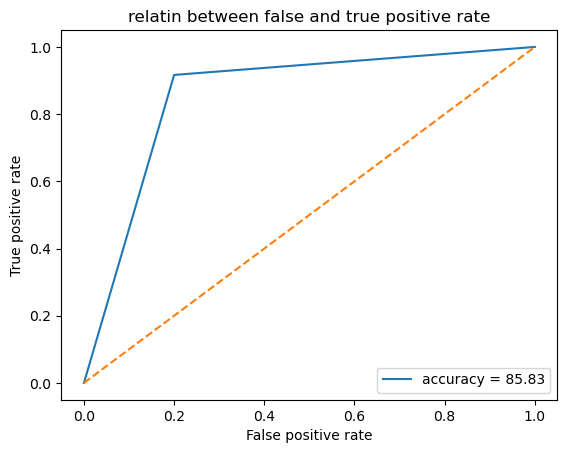

In [122]:
print('accuracy score of fpr and tpr is ','{:.2f}'.format(roc_auc_score(y_test,y_pred)*100),' %')
plt.plot(fpr , tpr , label ='accuracy = {:.2f}'.format(roc_auc_score(y_test , y_pred)*100))
plt.plot([0,1],[0,1] , linestyle='--')
plt.title('relatin between false and true positive rate')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

# prediction

In [124]:
prediction = pd.DataFrame()
prediction['Actual'] = y_test
prediction['Predicted'] = y_pred
prediction

,Actual,Predicted
237,0,1
314,1,1
500,0,0
728,0,0
564,1,1
...,...,...
789,0,0
566,0,0
546,0,1
313,1,1
